#### Import libraries

In [16]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

In [2]:
fits_path = 'LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits'
hpx_map = hp.read_map(fits_path)

In [3]:
help(hp)

Help on package healpy:

NAME
    healpy

DESCRIPTION
    HealPy is a package to manipulate Healpix maps (ang2pix, pix2ang) and
    compute spherical harmonics tranforms on them.

PACKAGE CONTENTS
    _healpy_pixel_lib
    _healpy_sph_transform_lib
    _hotspots
    _line_integral_convolution
    _masktools
    _pixelfunc
    _query_disc
    _sphtools
    cookbook
    fitsfunc
    newvisufunc
    pixelfunc
    projaxes
    projector
    rotator
    sphtfunc
    test (package)
    utils (package)
    version
    visufunc
    zoomtool

FUNCTIONS
    disable_warnings()
        .. deprecated:: 1.15.0
            The disable_warnings function is deprecated and may be removed in a future version.
        
        healpy uses logging now
        
            This function has no effect
    
    enable_warnings()
        .. deprecated:: 1.15.0
            The enable_warnings function is deprecated and may be removed in a future version.
        
        healpy uses logging now
        
       

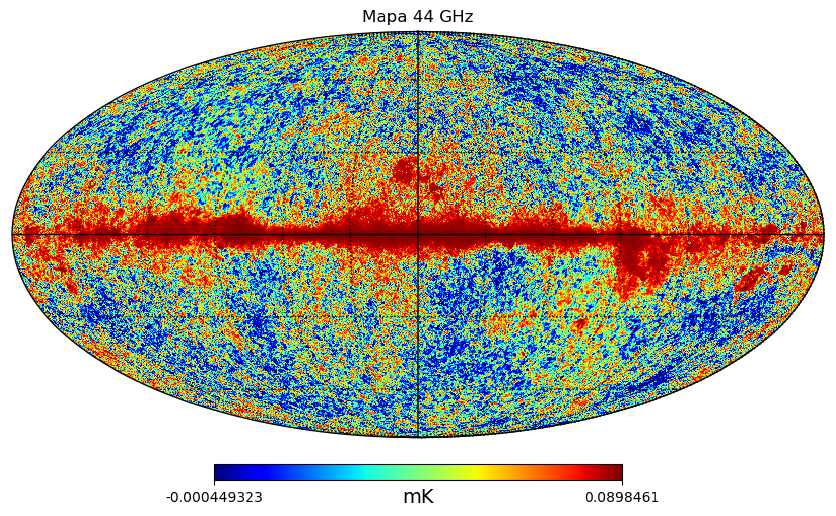

In [9]:
hp.mollview(hpx_map, title="Mapa 44 GHz", unit='mK', norm='hist', cmap = 'jet')
hp.graticule()

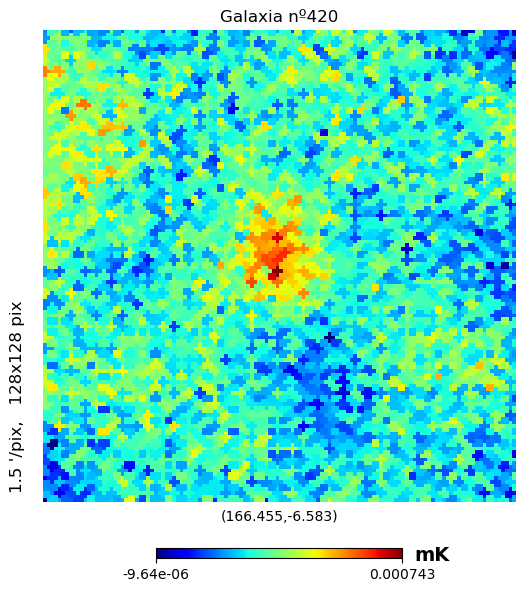

In [10]:
with fits.open('COM_PCCS_044_R2.04.fits') as hdul:
    data = hdul[1].data
    # Supongamos que las columnas que contienen glat y glon se llaman 'GLAT' y 'GLON'
    glat = data['GLAT'][420] 
    glon = data['GLON'][420]

#nside = hp.get_nside(hpx_map_smooth)
#theta = 0.5 * np.pi - np.radians(glat)
#phi = np.radians(glon)
#pix = hp.ang2pix(nside, theta, phi)

# Visualizar el área alrededor de la galaxia
hp.gnomview(map=hpx_map, rot=(glon, glat, 0), title='Galaxia nº420', unit='mK', xsize=128, ysize=128, cmap = 'jet')
plt.show()

In [16]:
help(hp.smoothing)

Help on function smoothing in module healpy.sphtfunc:

smoothing(map_in, fwhm=0.0, sigma=None, beam_window=None, pol=True, iter=3, lmax=None, mmax=None, use_weights=False, use_pixel_weights=False, datapath=None, verbose=True, nest=False)
    Smooth a map with a Gaussian symmetric beam.
    
    No removal of monopole or dipole is performed.
    
    Parameters
    ----------
    map_in : array or sequence of 3 arrays
      Either an array representing one map, or a sequence of
      3 arrays representing 3 maps, accepts masked arrays
    fwhm : float, optional
      The full width half max parameter of the Gaussian [in
      radians]. Default:0.0
    sigma : float, optional
      The sigma of the Gaussian [in radians]. Override fwhm.
    beam_window: array, optional
      Custom beam window function. Override fwhm and sigma.
    pol : bool, optional
      If True, assumes input maps are TQU. Output will be TQU maps.
      (input must be 1 or 3 alms)
      If False, each map is assumed 

In [11]:
# mapa es tu mapa CMB cargado
fwhm_degrees = 0.25
fwhm_radians = np.deg2rad(fwhm_degrees)

hpx_map_smooth = hp.smoothing(hpx_map, fwhm=fwhm_radians)

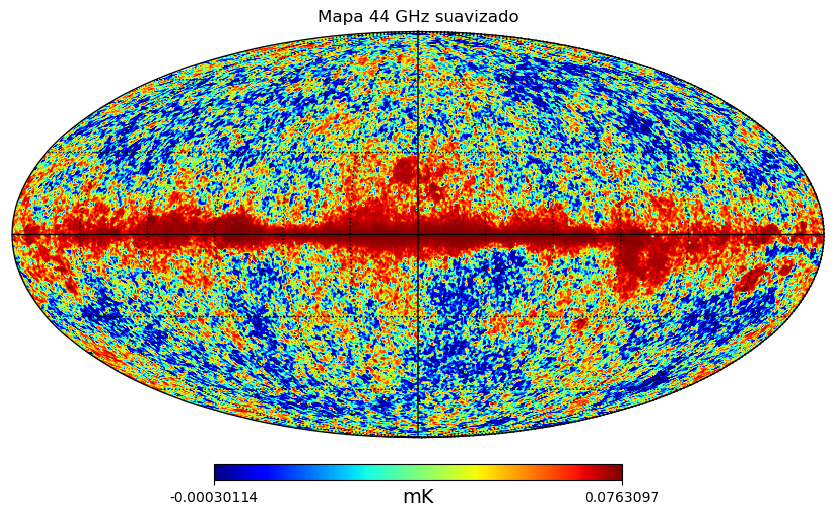

In [13]:
hp.mollview(hpx_map_smooth, title="Mapa 44 GHz suavizado", unit='mK', norm='hist', cmap = 'jet')
hp.graticule()

In [39]:
# Obtener el nside del mapa
nside = hp.get_nside(hpx_map_smooth)

print(f"The nside of the smoothed map is: {nside}")

The nside of the smoothed map is: 1024


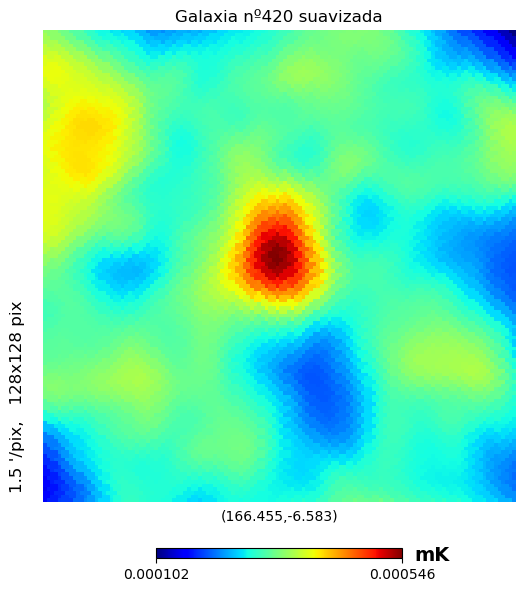

In [14]:
with fits.open('COM_PCCS_044_R2.04.fits') as hdul:
    data = hdul[1].data
    # Supongamos que las columnas que contienen glat y glon se llaman 'GLAT' y 'GLON'
    glat = data['GLAT'][420] 
    glon = data['GLON'][420]

#nside = hp.get_nside(hpx_map_smooth)
#theta = 0.5 * np.pi - np.radians(glat)
#phi = np.radians(glon)
#pix = hp.ang2pix(nside, theta, phi)

# Visualizar el área alrededor de la galaxia
hp.gnomview(map=hpx_map_smooth, rot=(glon, glat, 0), title='Galaxia nº420 suavizada', unit='mK', xsize=128, ysize=128, cmap = 'jet')
plt.show()

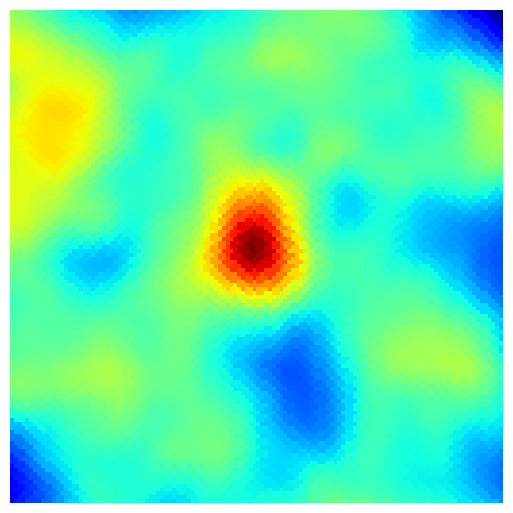

In [43]:
reso = 1.5
hp.gnomview(map=hpx_map_smooth, rot=(glon, glat, 0), reso=reso, xsize=128, ysize=128, title='', notext=True, cmap = 'jet',  return_projected_map=True, cbar = False)
plt.savefig('plot.png', bbox_inches='tight', pad_inches=0)

In [15]:
os.makedirs('galaxy_images', exist_ok=True)
# Carga el catálogo de galaxias
with fits.open('COM_PCCS_044_R2.04.fits') as hdul:
    data = hdul[1].data
    n_galaxies = len(data)

for i in range(n_galaxies):
    glat = data['GLAT'][i]
    glon = data['GLON'][i]
    reso = 1.5
    hp.gnomview(map=hpx_map_smooth, rot=(glon, glat, 0), reso=reso, xsize=128, ysize=128, title='',
                notext=True, cmap = 'jet',  return_projected_map=True, cbar = False)
    plt.savefig(f'galaxy_images/galaxy_{i}.png', bbox_inches='tight', pad_inches=0)
    plt.close()

In [18]:
# Leer el archivo FITS
with fits.open('COM_PCCS_044_R2.04.fits') as hdul:
    data = hdul[1].data
    # Supongamos que las columnas que contienen glat y glon se llaman 'GLAT' y 'GLON'
    glat = data['GLAT']
    glon = data['GLON']

In [19]:
# Crear una máscara para las posiciones de las galaxias
nside = 1024
theta = 0.5 * np.pi - np.radians(glat)
phi = np.radians(glon)
galaxy_pixels = hp.ang2pix(nside, theta, phi)
mask = np.ones(hp.nside2npix(nside), dtype=bool)
mask[galaxy_pixels] = False

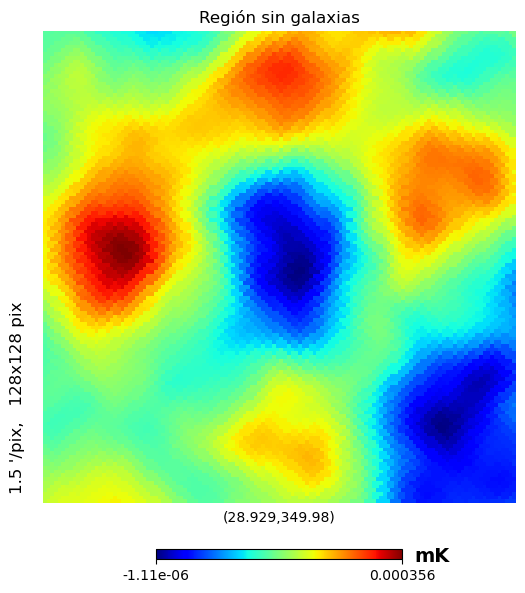

In [46]:
# Aplicar la máscara
masked_map = np.copy(hpx_map_smooth)
masked_map[~mask] = np.nan  # Establecer los píxeles con galaxias como NaN

# Seleccionar una región aleatoria del cielo que no contenga galaxias
#np.random.seed(33)  # Para reproducibilidad
free_pixels = np.where(mask)[0]
random_pixel = np.random.choice(free_pixels)
theta, phi = hp.pix2ang(nside, random_pixel, lonlat=True)

# Visualizar el área alrededor de la región seleccionada
hp.gnomview(map=masked_map, rot=(phi, theta, 0), title='Región sin galaxias', unit='mK', 
            xsize=128, ysize=128, cmap='jet')
plt.show()

In [49]:
os.makedirs('no_galaxy_images', exist_ok=True)
# Número de imágenes que queremos generar
n_images = 420

# Generar imágenes sin galaxias
for i in range(n_images):
    np.random.seed(i)  # Para reproducibilidad
    free_pixels = np.where(mask)[0]
    random_pixel = np.random.choice(free_pixels)
    theta, phi = hp.pix2ang(nside, random_pixel)

    # Visualizar el área alrededor de la región seleccionada
    reso = 1.5
    hp.gnomview(map=hpx_map_smooth, rot=(np.degrees(phi), 90 - np.degrees(theta), 0), reso=reso, xsize=128, ysize=128, title='', notext=True, cmap='jet', return_projected_map=True, cbar=False)
    plt.savefig(f'no_galaxy_images/no_galaxy_{i}.png', bbox_inches='tight', pad_inches=0)
    plt.close()